##Problem Statement


This dataset provide a valuable oppertunity to analyze and predict house prices based on vaious features such as area,the number of bedroom and bathroom,furnishing status,and loccation-related attribute. By leveraging the data, one can develop predictive models to estimate house price accurately or analyze impact or specific features,like praking spaces or air conditioning ,on pricing



# House Price Predicition using ML

#  Importing Modules

In [ ]:
#  Importing Modules

In [ ]:
# Importing all the neassary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  Importing Dataset


> Add blockquote



In [ ]:
df=pd.read_csv("/content/drive/MyDrive/house price/Housing.csv")

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


This dataset provides comprehensive information for house price prediction, with 13 column names:

Price: The price of the house.

Area: The total area of the house in square feet.

Bedrooms: The number of bedrooms in the house.

Bathrooms: The number of bathrooms in the house.

Stories: The number of stories in the house.

Mainroad: Whether the house is connected to the main road (Yes/No).

Guestroom: Whether the house has a guest room (Yes/No).

Basement: Whether the house has a basement (Yes/No).

Hot water heating: Whether the house has a hot water heating system (Yes/No).

Airconditioning: Whether the house has an air conditioning system (Yes/No).

Parking: The number of parking spaces available within the house.

Prefarea: Whether the house is located in a preferred area (Yes/No).

Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).


## Exploratory Data Analysis(EDA)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


<Axes: >

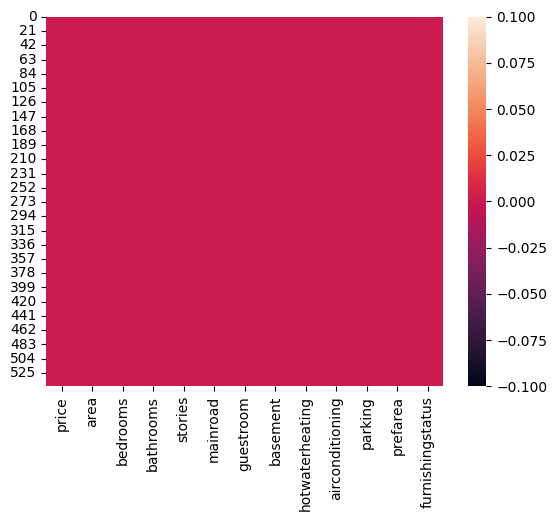

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.nunique().to_frame("Unique Values")

,Unique Values
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


In [ ]:
df[df.columns[(df=='?').any()]].nunique()

,0


# Data Visualization

In [ ]:
bedroom_count=df['bedrooms'].value_counts()
bedroom_count

,count
bedrooms,
3,300
2,136
4,95
5,10
6,2
1,2


The code aims to figure out how many houses in the dataset have different numbers of bedrooms. It first selects the 'bedrooms' column from the housing data and then uses a function called value_counts() to count how many times each unique bedroom number appears. The result of this counting is stored in a variable called bedroom_count. Finally, the code displays the contents of bedroom_count, showing you a summary of the bedroom distribution in your dataset (e.g., how many houses have 1 bedroom, 2 bedrooms, etc.). This information is helpful for understanding the characteristics of the houses in your dataset.

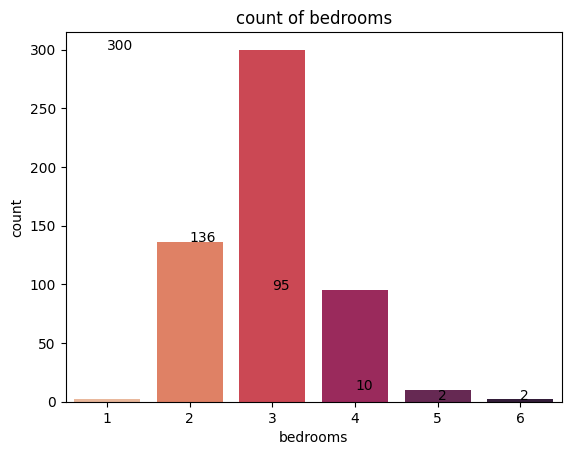

In [ ]:
ax=sns.barplot(x=bedroom_count.index, y=bedroom_count.values,palette="rocket_r")
for index,value in enumerate(bedroom_count.values):
    plt.text(index,value,str(value))
plt.title('count of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
plt.show()


This bar chart shows the distribution of houses based on the number of bedrooms. Three-bedroom houses are the most common, with a count of 300, followed by two-bedroom houses at 136. Four-bedroom houses are much less frequent, with only 10 occurrences, while houses with five or six bedrooms are rare, each having just 2 instances. One-bedroom houses are nearly negligible. Overall, the chart highlights that medium-sized homes (two to three bedrooms) are the most prevalent in the dataset.

In [ ]:
bathroom_count=df['bathrooms'].value_counts()
bathroom_count

,count
bathrooms,
1,401
2,133
3,10
4,1


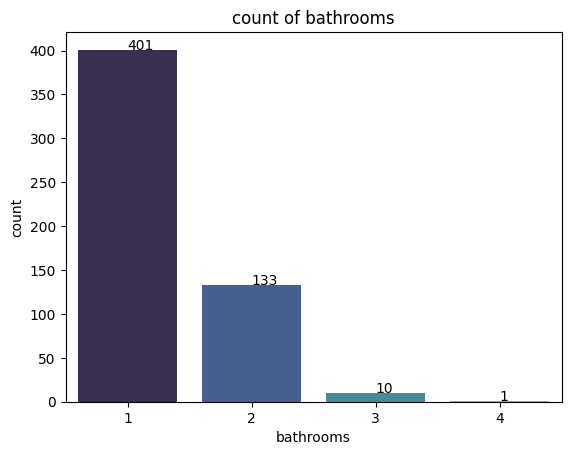

In [ ]:
ax = sns.barplot(x=bathroom_count.index,y=bathroom_count.values,palette="mako")
for index,value in enumerate(bathroom_count.values):
    plt.text(index,value,str(value))
plt.title('count of bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('count')
plt.show()


This bar chart illustrates the distribution of houses based on the number of bathrooms. Houses with one bathroom are the most common, with a count of 401. Two-bathroom houses follow with 133, while houses with three bathrooms are rare, with only 10 occurrences. Four-bathroom houses are exceptionally scarce, represented by just one instance. Overall, the data highlights that most houses have either one or two bathrooms, with a significant majority having just one

In [ ]:
stories_count = df['stories'].value_counts()
stories_count

,count
stories,
2,238
1,227
4,41
3,39


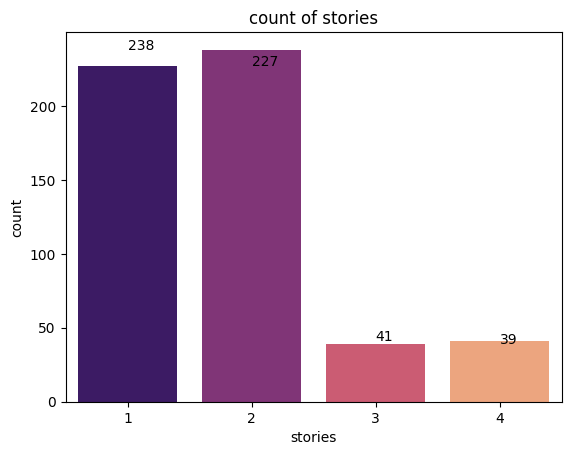

In [ ]:
ax = sns.barplot(x=stories_count.index,y=stories_count.values,palette="magma")
for index,value in enumerate(stories_count.values):
    plt.text(index,value,str(value))
plt.title('count of stories')
plt.xlabel('stories')
plt.ylabel('count')
plt.show()


This bar chart represents the distribution of houses based on the number of stories. Houses with one story (238) and two stories (227) dominate the dataset, making them the most common types. Three-story houses are less frequent, with a count of 41, and four-story houses are slightly rarer, appearing 39 times. Overall, houses with one or two stories constitute the majority, while those with three or four stories are comparatively uncommon.

In [ ]:
count_mainroad=df['mainroad'].value_counts()
count_mainroad

,count
mainroad,
yes,468
no,77


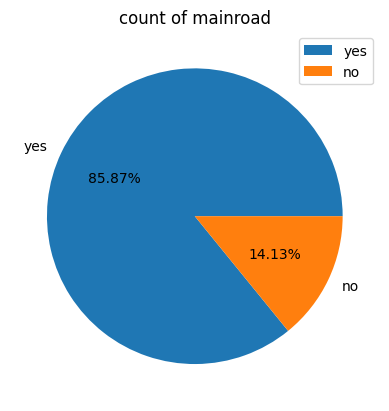

In [ ]:
plt.pie(count_mainroad.values,labels=count_mainroad.index,autopct='%1.2f%%')
plt.title('count of mainroad')
plt.legend(loc = "best")


85.87% of houses are located near a main road (yes).

14.13% of houses are not near a main road (no).

---



In [ ]:
guestroom_count = df['guestroom'].value_counts()
guestroom_count

,count
guestroom,
no,448
yes,97


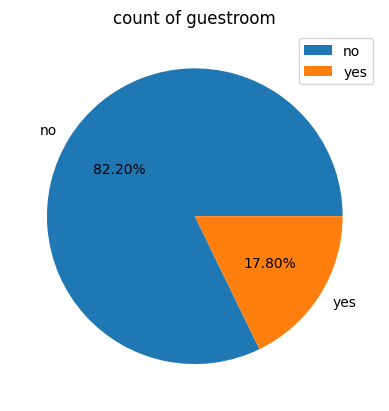

In [ ]:
plt.pie(guestroom_count.values,labels=guestroom_count.index,autopct='%1.2f%%')
plt.title('count of guestroom')
plt.legend(loc = "best")

The code will output a pie chart titled "count of guestroom". This pie chart will be divided into two slices, one representing houses with a guest room ("Yes") and the other representing houses without a guest room ("No"). Each slice will be proportionally sized to reflect the number of houses in that category. The percentage of houses in each category will be displayed on the corresponding slice with two decimal places and a percentage sign (e.g., 45.23%). A legend, positioned for optimal clarity, will identify which slice represents houses with a guest room and which represents those without. This visualization provides a clear and concise way to understand the proportion of houses with and without a guest room in the dataset.

In [ ]:
furnishingstatus_count = df.furnishingstatus.value_counts()
furnishingstatus_count

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


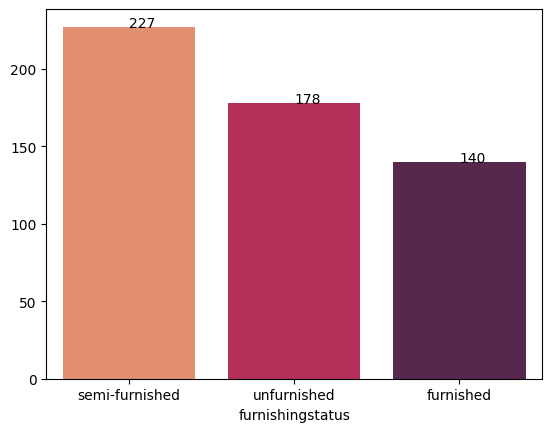

In [ ]:
sns.barplot(x=furnishingstatus_count.index,y=furnishingstatus_count.values,palette="rocket_r")
for index,value in enumerate(furnishingstatus_count.values):
    plt.text(index,value,str(value))

This code will generate a bar plot that visually represents the distribution of houses based on their furnishing status. The bar plot will have three bars, one for each category of furnishing status: "Fully Furnished", "Semi-Furnished", and "Unfurnished". The height of each bar corresponds to the number of houses falling into that furnishing category. Above each bar, you'll see the exact count of houses within that category displayed as a number. The bars will be colored using a "rocket_r" palette, which is a color scheme provided by Seaborn. Essentially, this visualization provides a quick way to compare the frequency of different furnishing statuses among the houses in the dataset. You'll be able to easily see which furnishing status is most common and how many houses belong to each category.

In [ ]:
prefarea_count = df.prefarea.value_counts()
prefarea_count

,count
prefarea,
no,417
yes,128


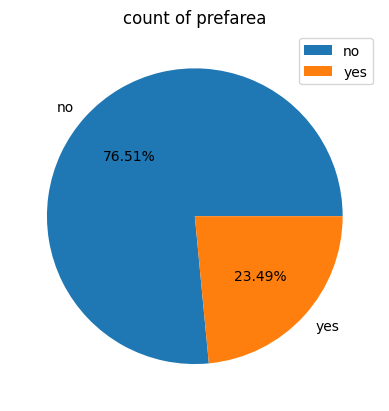

In [ ]:
plt.pie(prefarea_count.values,labels=prefarea_count.index,autopct='%1.2f%%')
plt.title('count of prefarea')
plt.legend(loc = "best")

The code takes data about houses and their preferred area status, creates a pie chart to show the proportion of houses in each category, adds a title, and includes a legend for clarity. This allows for easy visual interpretation of the distribution of houses in preferred areas.

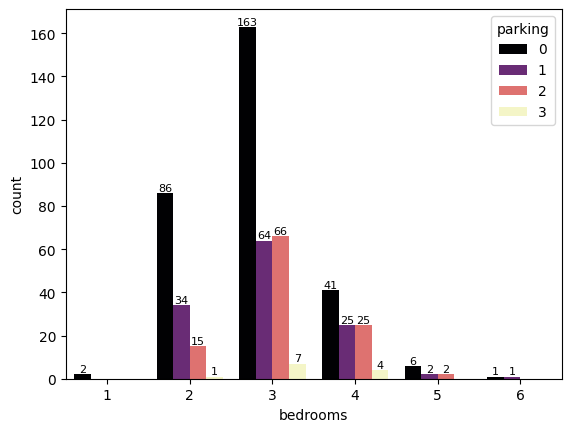

In [ ]:
ax = sns.countplot(df, x="bedrooms", hue="parking",palette="magma")
for i in range(len(df['parking'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)

This bar chart provides insights into the distribution of the number of bedrooms in houses while comparing them with the availability of parking spaces. Here's a concise analysis:

Houses with 3 bedrooms are the most common, with a significant number of them having 0, 1, or 2 parking spaces.
Houses with 2 bedrooms also show a notable presence, primarily having 0 parking spaces.

163 houses have 3 bedrooms and 0 parking spaces.
64 houses have 3 bedrooms and 1 parking space.
66 houses have 3 bedrooms and 2 parking spaces

For houses with 4 bedrooms, there is a relatively balanced distribution across 0, 1, and 2 parking spaces.

Houses with 1, 5, and 6 bedrooms are less frequent in the dataset, with a minimal count and varying parking availability.

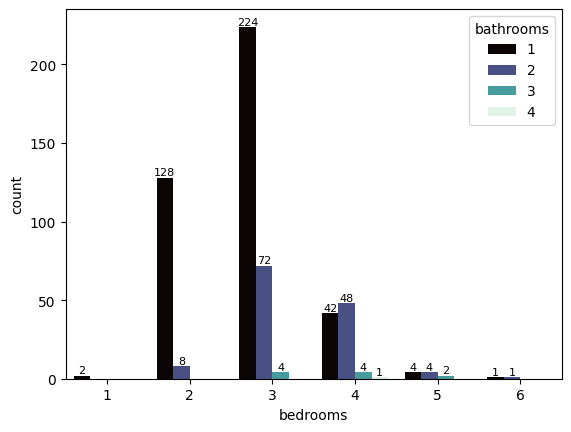

In [ ]:
ax = sns.countplot(df, x="bedrooms", hue="bathrooms",palette="mako")
for i in range(len(df['bathrooms'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.show()

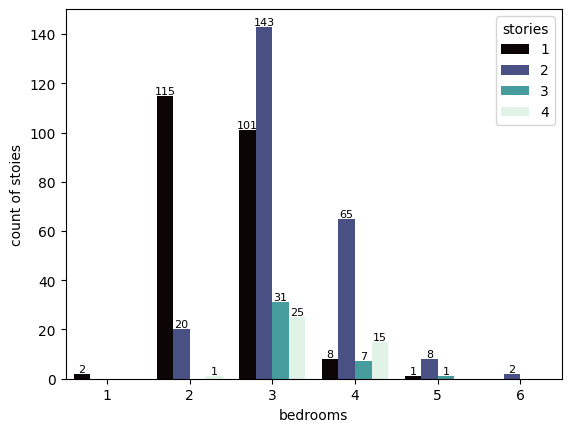

In [ ]:
ax = sns.countplot(df, x="bedrooms", hue="stories",palette="mako")
for i in range(len(df['stories'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of stoies')
plt.show()

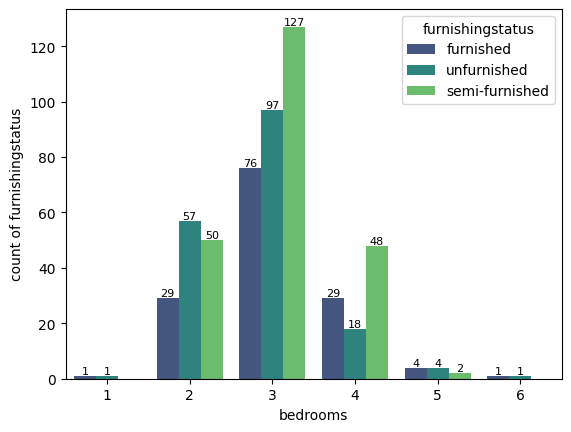

In [ ]:
ax = sns.countplot(df, x="bedrooms", hue="furnishingstatus",palette="viridis")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

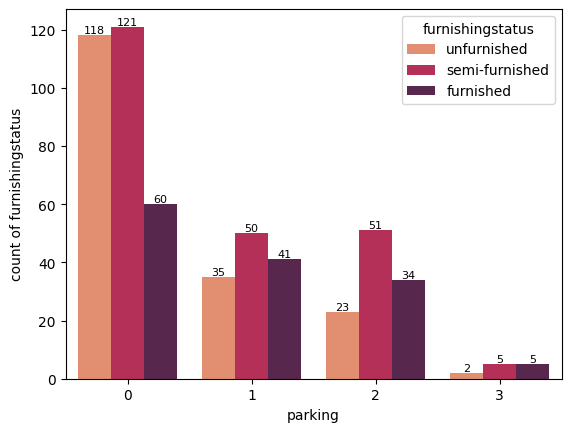

In [ ]:
ax = sns.countplot(df, x="parking", hue="furnishingstatus",palette="rocket_r")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()


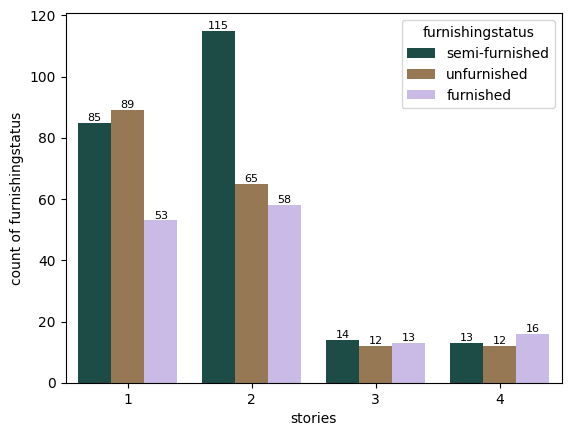

In [ ]:
ax=sns.countplot(df,hue='furnishingstatus',x="stories",palette="cubehelix")
for i in range(len(df['furnishingstatus'].unique())):
  ax.bar_label(ax.containers[i],fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()


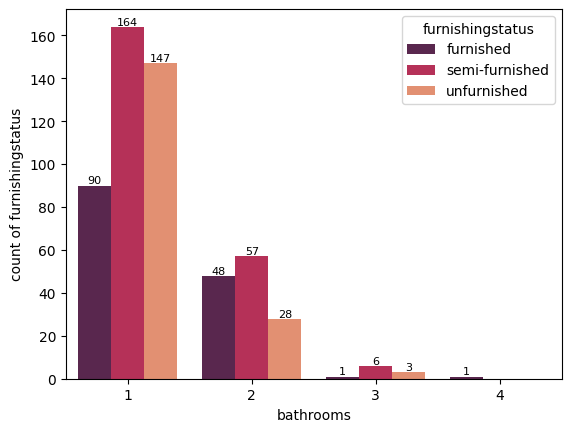

In [ ]:
ax = sns.countplot(df, x="bathrooms", hue="furnishingstatus",palette="rocket")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

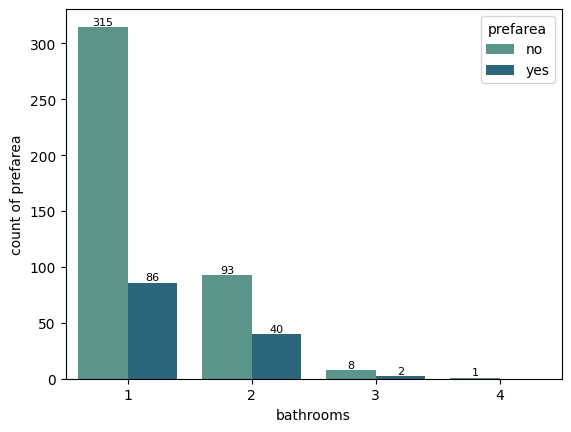

In [ ]:
ax = sns.countplot(df, x="bathrooms", hue="prefarea",palette="crest")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

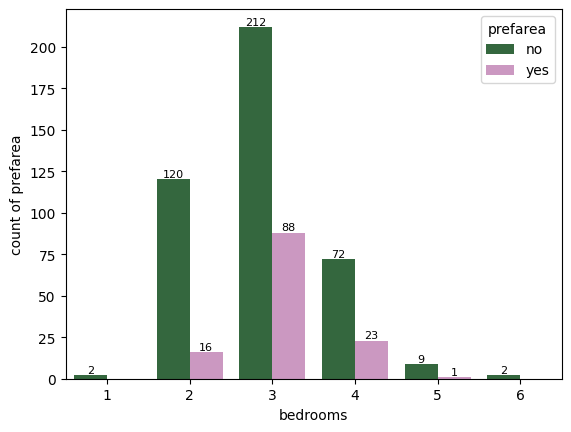

In [ ]:
ax = sns.countplot(df, x="bedrooms", hue="prefarea",palette="cubehelix")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

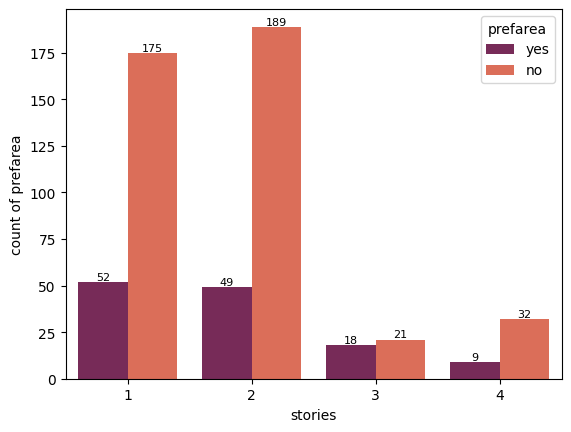

In [ ]:
ax = sns.countplot(df, x="stories", hue="prefarea",palette="rocket")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

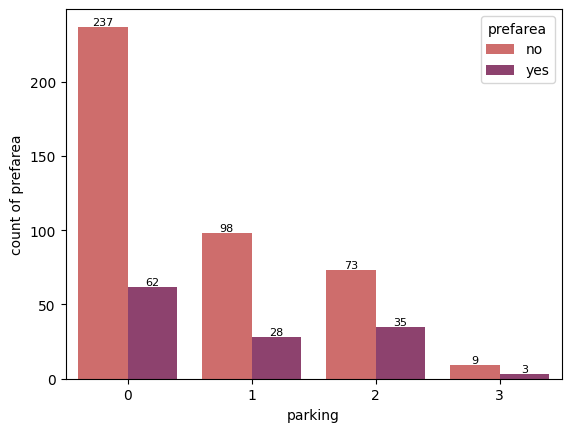

In [ ]:
ax = sns.countplot(df, x="parking", hue="prefarea",palette="flare")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

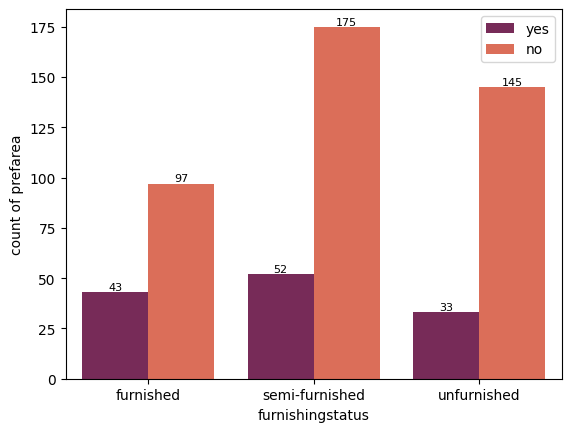

In [ ]:
ax = sns.countplot(df, x="furnishingstatus", hue="prefarea",palette="rocket")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.legend(loc = 'best')
plt.show()

In [ ]:
numcol=df.select_dtypes(include=np.number).columns
numcol

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

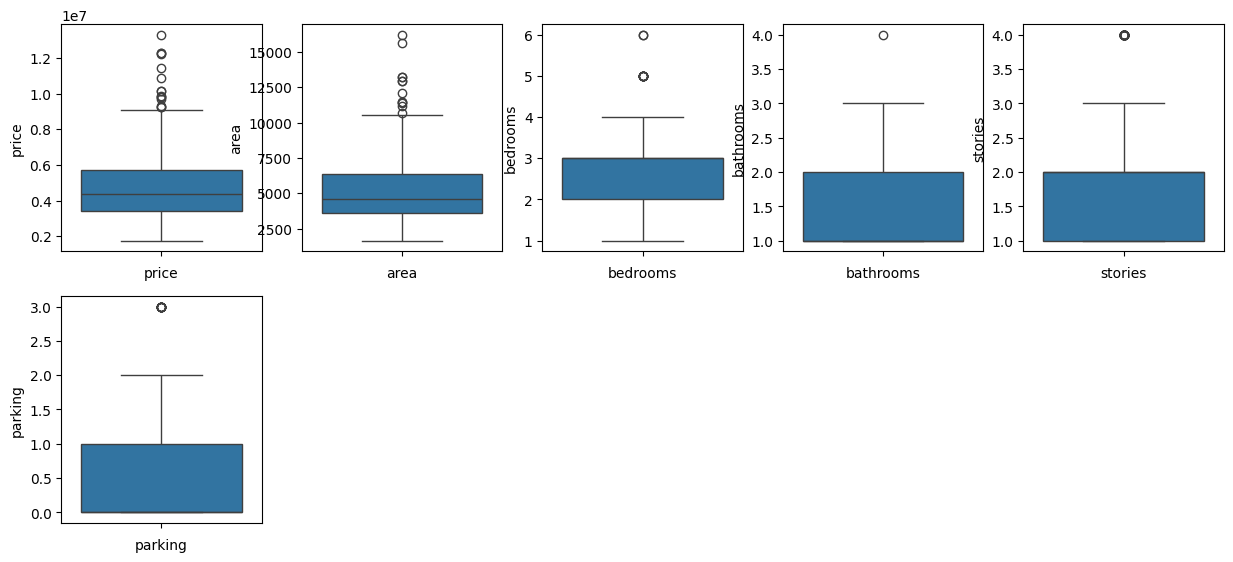

In [ ]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in numcol:
  if plotnumber<=15:
    ax=plt.subplot(3,5,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=10)
  plotnumber+=1

In [ ]:
features=df[['price','area','bedrooms','bathrooms','stories','parking']]
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,price,area,bedrooms,bathrooms,stories,parking
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409
4,3.554979,1.046726,1.403419,0.570187,0.224410,1.517692
...,...,...,...,...,...,...
540,1.576868,0.991879,1.308863,0.570187,0.929397,1.517692
541,1.605149,1.268613,0.047278,0.570187,0.929397,0.805741
542,1.614327,0.705921,1.308863,0.570187,0.929397,0.805741
543,1.614327,1.033389,0.047278,0.570187,0.929397,0.805741


In [ ]:
new_df=df[(z<3).all(axis=1)]
new_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished
14,9240000,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
new_df.shape

(522, 13)

In [ ]:
dataloss=(545-527)/545*100
dataloss

3.302752293577982

In [ ]:
catcol=df.select_dtypes(include='object').columns
catcol

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df[catcol]=new_df[catcol].apply(le.fit_transform)

In [ ]:
new_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,1
13,9240000,3500,4,2,2,1,0,0,1,0,2,0,0
14,9240000,7800,3,2,2,1,0,0,0,0,0,1,1


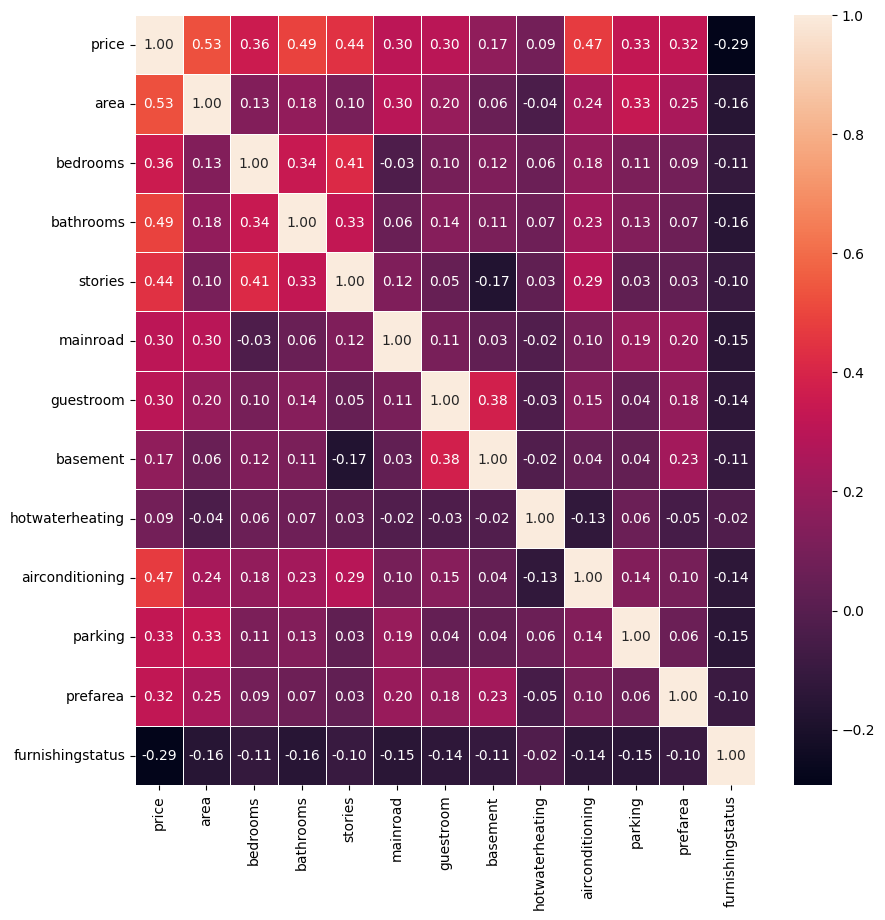

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(new_df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

In [ ]:
x=new_df.drop('price',axis=1)
y=new_df['price']

In [ ]:
x.shape,y.shape

((522, 12), (522,))

In [ ]:
y

,price
8,9870000
9,9800000
12,9310000
13,9240000
14,9240000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((417, 12), (105, 12), (417,), (105,))

r2 score 0.6154451005547776
MAE 717983.1643974257
MSE 1076831199422.3295
RMSE 1037704.7746938092


<Axes: xlabel='price'>

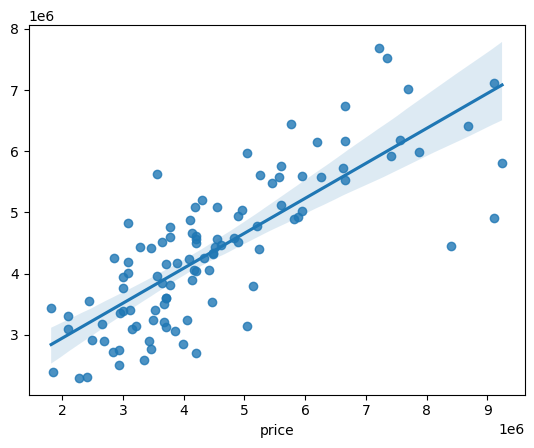

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
rf1=r2_score(ytest,ypred)
print('r2 score',rf1)
print('MAE',mean_absolute_error(ytest,ypred))
print('MSE',mean_squared_error(ytest,ypred))
print('RMSE',np.sqrt(mean_squared_error(ytest,ypred)))
sns.regplot(x=ytest,y=ypred)

r2 score 0.6111169021023626
MAE 723252.9666666667
MSE 1088951027144.134
RMSE 1043528.1630814446


<Axes: xlabel='price'>

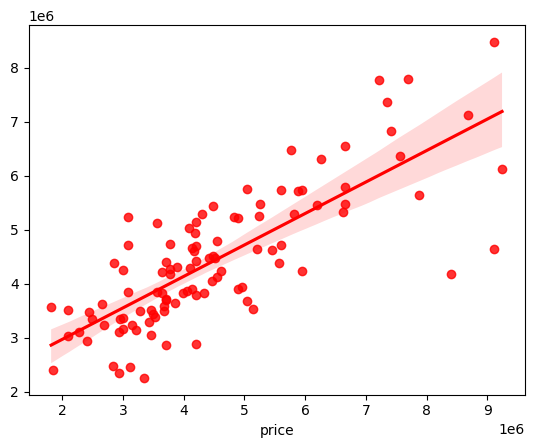

In [ ]:
re=RandomForestRegressor()
re.fit(xtrain,ytrain)
ypred=re.predict(xtest)
rf2=r2_score(ytest,ypred)
print('r2 score',rf2)
print('MAE',mean_absolute_error(ytest,ypred))
print('MSE',mean_squared_error(ytest,ypred))
print('RMSE',np.sqrt(mean_squared_error(ytest,ypred)))
sns.regplot(x=ytest,y=ypred,color='red')

r2 score 0.3319632372136283
MAE 1017066.6666666666
MSE 1870637533333.3333
RMSE 1367712.518526219


<Axes: xlabel='price'>

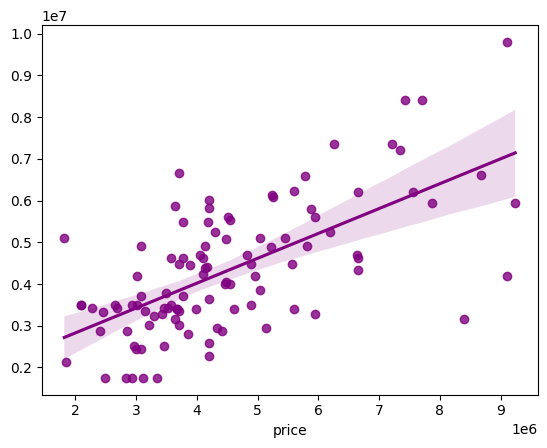

In [ ]:
DTR=DecisionTreeRegressor()
DTR.fit(xtrain,ytrain)
ypred=DTR.predict(xtest)
rf3=r2_score(ytest,ypred)
print('r2 score',rf3)
print('MAE',mean_absolute_error(ytest,ypred))
print('MSE',mean_squared_error(ytest,ypred))
print('RMSE',np.sqrt(mean_squared_error(ytest,ypred)))
sns.regplot(x=ytest,y=ypred,color='purple')


r2 score 0.5883995589233507
MAE 787851.2045508405
MSE 1152564165186.1538
RMSE 1073575.411969813


<Axes: xlabel='price'>

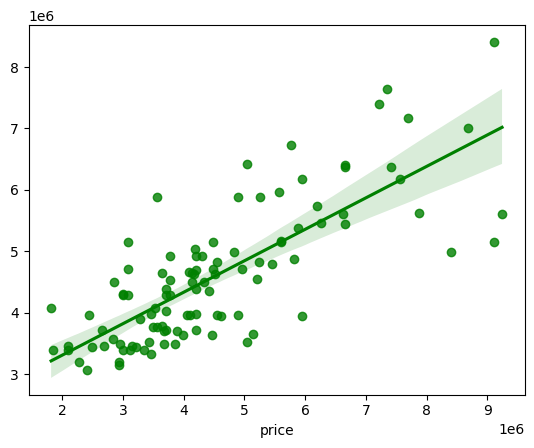

In [ ]:
ADR=AdaBoostRegressor()
ADR.fit(xtrain,ytrain)
ypred=ADR.predict(xtest)
rf4=r2_score(ytest,ypred)
print('r2 score',rf4)
print('MAE',mean_absolute_error(ytest,ypred))
print('MSE',mean_squared_error(ytest,ypred))
print('RMSE',np.sqrt(mean_squared_error(ytest,ypred)))
sns.regplot(x=ytest,y=ypred,color='green')

R2 Score: 0.544624089414028
MAE: 798372.6
MSE: 1275144299791.1333
RMSE: 1129222.8742773205


<Axes: xlabel='price'>

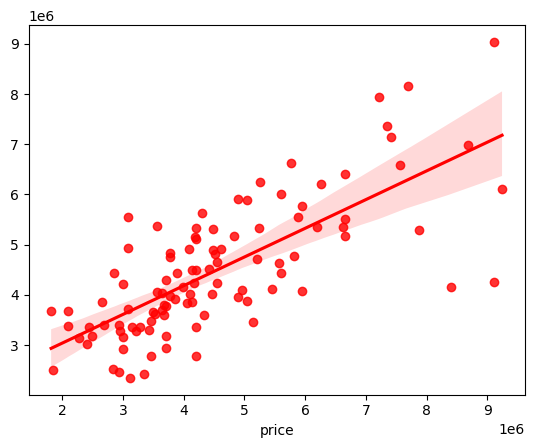

In [ ]:
from sklearn import metrics
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(xtrain,ytrain)
#Prediction
predBR=BR.predict(xtest)
br1=r2_score(ytest,predBR)
print("R2 Score:",br1)
print("MAE:",metrics.mean_absolute_error(ytest,predBR))
print("MSE:",metrics.mean_squared_error(ytest,predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest,predBR)))
sns.regplot(x=ytest,y=predBR,color='r')

R2 Score: 0.6713361869625741
MAE: 678339.6912764399
MSE: 920324896420.2073
RMSE: 959335.653679257


<Axes: xlabel='price'>

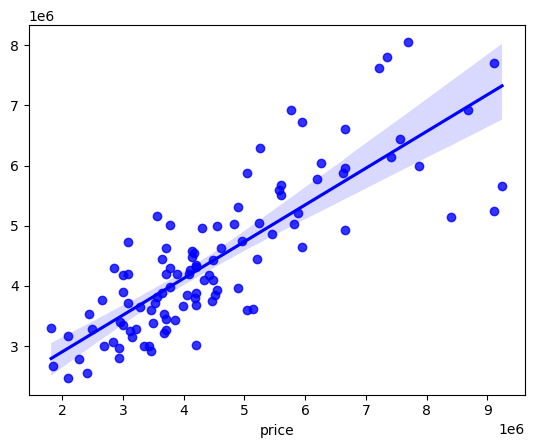

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(xtrain,ytrain)
#Prediction
predGB=GB.predict(xtest)
gb2=r2_score(ytest,predGB)
print("R2 Score:",gb2)
print("MAE:",metrics.mean_absolute_error(ytest,predGB))
print("MSE:",metrics.mean_squared_error(ytest,predGB))
print("RMSE:",np.sqrt(metrics .mean_squared_error(ytest,predGB)))
sns.regplot(x=ytest,y=predGB,color='b')

R2 Score: 0.5707355737686157
MAE: 801451.4375
MSE: 1202026708992.0
RMSE: 1096369.7866103388


<Axes: xlabel='price'>

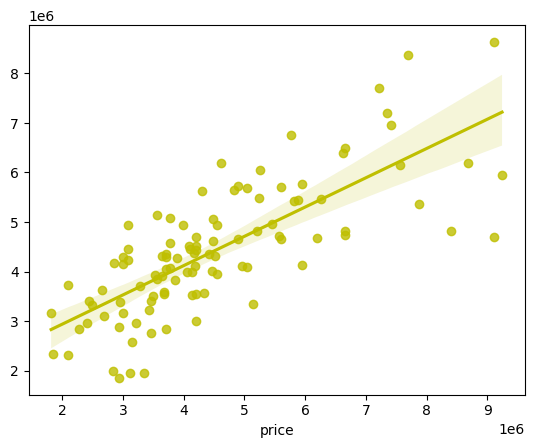

In [ ]:
from xgboost import XGBRegressor as xgb
XGB=xgb()
XGB.fit(xtrain,ytrain)
#Prediction
predXGB=XGB.predict(xtest)
xgb1=r2_score(ytest,predXGB)
print("R2 Score:",xgb1)
print("MAE:",metrics.mean_absolute_error(ytest,predXGB))
print("MSE:",metrics.mean_squared_error(ytest,predXGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest,predXGB)))
sns.regplot(x=ytest,y=predXGB,color='y')

R2 Score: 0.6034275174872992
MAE: 760113.0733333334
MSE: 1110482853340.6113
RMSE: 1053794.5024247428


<Axes: xlabel='price'>

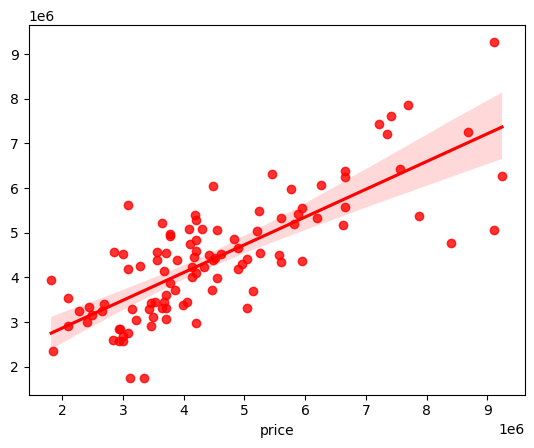

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
XT=ExtraTreesRegressor()
XT.fit(xtrain,ytrain)
predXT=XT.predict(xtest)
etr1=r2_score(ytest,predXT)
print("R2 Score:",etr1)
print("MAE:",metrics.mean_absolute_error(ytest,predXT))
print("MSE:",metrics.mean_squared_error(ytest,predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest,predXT)))
sns.regplot(x=ytest,y=predXT,color='r')

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rf_cv=cross_val_score(re,x,y,cv=5).mean()
rf_cv

-11.795846585460307

In [ ]:
lr_cv=cross_val_score(lr,x,y,cv=5).mean()
lr_cv

-9.920691947704979

In [ ]:
dtr_cv=cross_val_score(DTR,x,y,cv=5).mean()
dtr_cv

-34.878337134978096

In [ ]:
adr_cv=cross_val_score(ADR,x,y,cv=5).mean()
adr_cv

-14.254323653341071

In [ ]:
br_cv=cross_val_score(BR,x,y,cv=5).mean()
br_cv

-14.117921743116863

In [ ]:
gb_cv=cross_val_score(GB,x,y,cv=5).mean()
gb_cv

-10.981103002837596

In [ ]:
Ex_cv=cross_val_score(XT,x,y,cv=5).mean()
Ex_cv

-13.758142602996855

In [ ]:
Model_list=['RandomForestRegressor','LinearRegression','DecisionTreeRegressor','AdaBoostRegressor','BaggingRegressor','GradientBoostingRegressor','ExtraTreesRegressor']

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
paramter={'n_estimators':[50,100,200,400],
          'max_depth':[4,6,8,10],
          'gamma':np.arange(0,0.5,0.1),
          'n_jobs':[-2,-1,1]}

In [ ]:
GCV=GridSearchCV(xgb(),paramter,cv=5)

R2_Score 0.667029619216919
MAE 712197.0
MSE 932384210944.0
RMSE 965600.4406295598


<Axes: xlabel='price'>

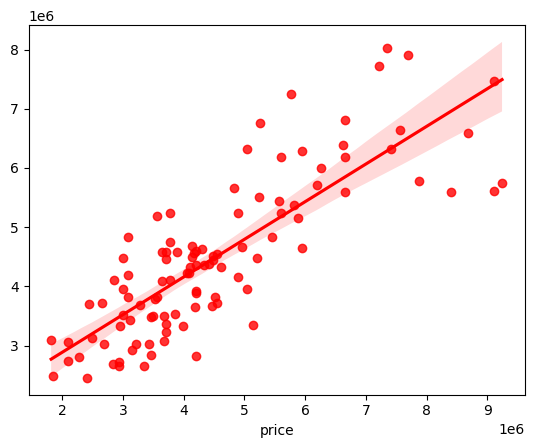

In [ ]:
Final_model2=xgb(gamma=0.0,max_depth=2,n_estimator=400,n_jobs=-2)
Final_model2.fit(xtrain,ytrain)
pred=Final_model2.predict(xtest)
print('R2_Score',r2_score(ytest,pred))
print('MAE',metrics.mean_absolute_error(ytest,pred))
print('MSE',metrics.mean_squared_error(ytest,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(ytest,pred)))
sns.regplot(x=ytest,y=pred,color='r')

Great!!!...After hyper parameter tuning our best model accuracy increased and is giving 67.01% which is good.